In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

print("Pandas version:", pd.__version__)

In [65]:
df = pd.read_csv('./data/titanic.csv')

print(df.shape)

(891, 12)


In [66]:
df.sample(3)
print(df.shape)
print(f"El shape del conjunto de entrenamiento es {df.shape}. {df.shape[0]} filas y {df.shape[1]} columnas.") 

(891, 12)
El shape del conjunto de entrenamiento es (891, 12). 891 filas y 12 columnas.


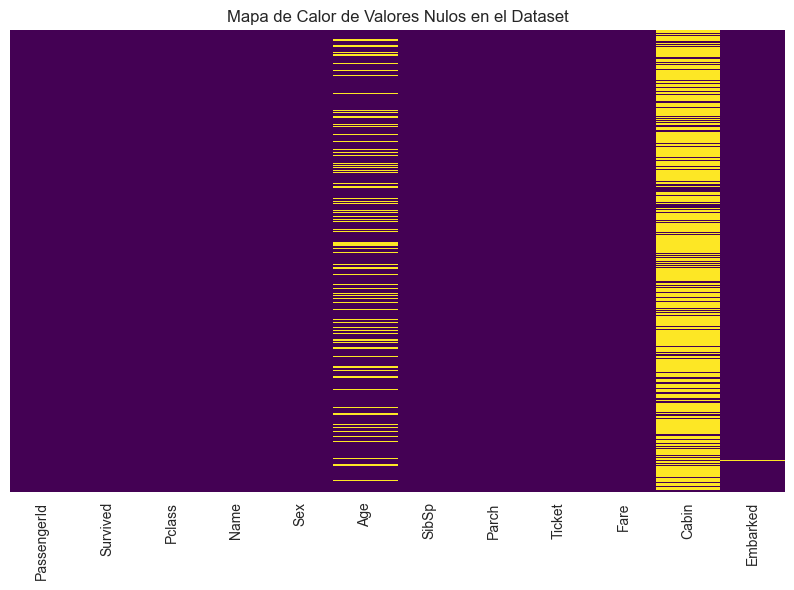

In [67]:

# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 6))

# Creamos el mapa de calor de valores nulos
# df.isnull() devuelve True donde hay un nulo, False donde no.
# cbar=False elimina la barra de colores lateral para mayor claridad.
# yticklabels=False oculta los nombres de las filas si el dataset es muy grande.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Añadimos título y etiquetas
plt.title('Mapa de Calor de Valores Nulos en el Dataset')
plt.show()

In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
missing_values_percentage = df.isnull().mean() * 100
missing_values_percentage = missing_values_percentage.round(2).sort_values(ascending=False)
print(missing_values_percentage)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64


/var/folders/mb/z9zjwm1x7jx8j257pq6v5fyh0000gn/T/ipykernel_34513/377631955.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulos_por_columna.index, y=nulos_por_columna.values, palette='magma')


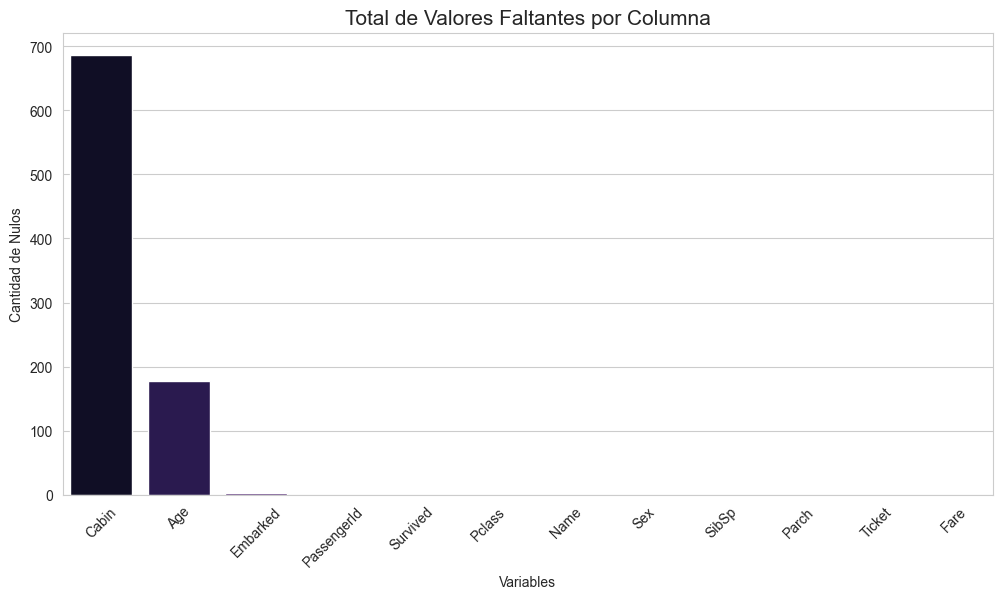

In [71]:


# 1. Calculamos la suma de nulos por columna y ordenamos de mayor a menor
nulos_por_columna = df.isnull().sum().sort_values(ascending=False)

# 2. Configuramos el estilo y tamaño de la gráfica
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 3. Creamos la gráfica de barras
# Usamos el índice (nombres de columnas) en X y los valores (conteo) en Y
sns.barplot(x=nulos_por_columna.index, y=nulos_por_columna.values, palette='magma')

# 4. Personalización del gráfico
plt.title('Total de Valores Faltantes por Columna', fontsize=15)
plt.xticks(rotation=45) # Rotamos los nombres para que se lean bien
plt.ylabel('Cantidad de Nulos')
plt.xlabel('Variables')

plt.show()

In [72]:
df.drop('Cabin', axis=1, inplace=True)

In [73]:
median_age = df['Age'].median()
mean_age = df['Age'].mean()
print(f"La mediana de la columna 'Age' es: {median_age} y la media es: {mean_age}")

df['Age'].fillna(median_age, inplace=True)

df.info()


La mediana de la columna 'Age' es: 28.0 y la media es: 29.69911764705882
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


/var/folders/mb/z9zjwm1x7jx8j257pq6v5fyh0000gn/T/ipykernel_34513/2637421245.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [75]:
# Te dirá: array(['male', 'female'], dtype=object)
print(df['Embarked'].unique())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

['S' 'C' 'Q']


In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df.shape

(891, 11)

In [78]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [79]:
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('PassengerId', axis = 1, inplace = True)

In [64]:
import os

# 1. Definimos el nombre de la carpeta y el archivo
carpeta = "data"
nombre_archivo = "titanic_clean.csv"
ruta_completa = os.path.join(carpeta, nombre_archivo)

# 2. Verificamos si la carpeta existe, si no, la creamos para evitar errores
if not os.path.exists(carpeta):
    os.makedirs(carpeta)
    print(f"Carpeta '{carpeta}' creada.")

# 3. Guardamos el archivo en esa ruta
df.to_csv(ruta_completa, index=False)

print(f"¡Archivo guardado con éxito en: {ruta_completa}!")

¡Archivo guardado con éxito en: data/titanic_clean.csv!


In [60]:
df.shape

(891, 8)